In [88]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

pos_dic = defaultdict(lambda: [])
with open("data/osmfish/osmFISH_excitatory_neurons_dataset.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[6])
        y = float(entries[7])
        g = entries[2]
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
"""
with open("data/osmfish/osmFISH_counts_excitatory_roi_0.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[5])
        y = float(entries[6])
        g = entries[1]
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
"""
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

,hybridization,gene,dot_id,r_px,c_px,x_um,y_um,intensity



In [90]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [92]:
minmax_x, minmax_y

([0.0, 3619.181708215396], [0.0, 2422.1642976063104])

In [93]:
width, height = 3620, 2423

In [94]:
import ssam

In [95]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/osmfish_new_excitatory", verbose=True)

In [96]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene Brinp2...
Processing gene Coro6...
Processing gene Cux2...
Processing gene Galnt14...
Processing gene Map3k7cl...
Processing gene Pdgfra...
Processing gene Prox1...
Processing gene Slc17a8...
Processing gene Slit3...
Processing gene Sv2c...
Processing gene Tgm3...
Processing gene Tmem108...
Processing gene Tshz2...


In [97]:
exp_thres = 0.1
norm_thres = 1.0

In [98]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 1934 local max vectors.


In [99]:
import matplotlib.pyplot as plt

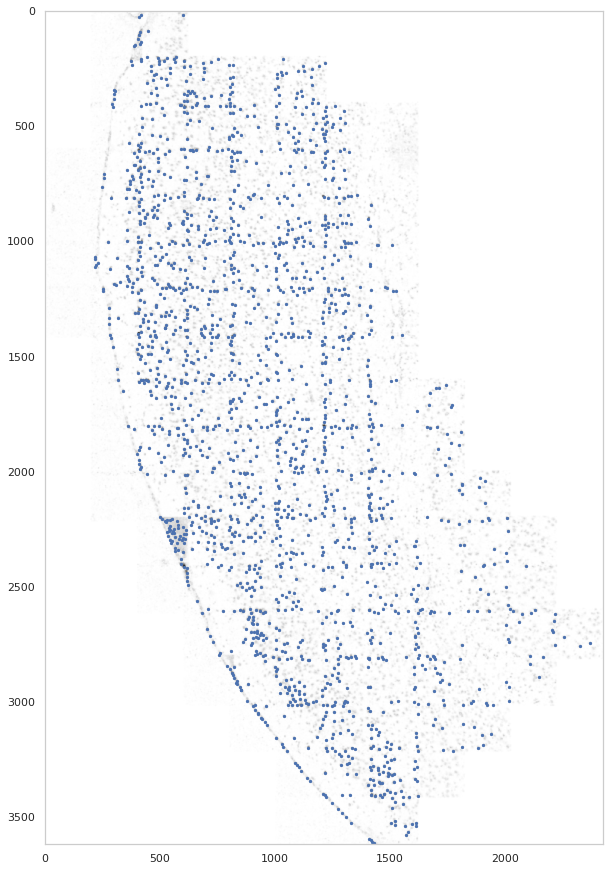

In [100]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)

In [102]:
analysis.normalize_vectors_sctransform(vst_kwargs=dict(min_cells=1))

In [107]:
import pickle
with open("scrna_sigs.pkl", "rb") as f:
    scrna_clusters, scrna_genes, scrna_full_centroids, scrna_colors = pickle.load(f)

In [109]:
selected_genes_idx = [list(scrna_genes).index(g) for g in ds.genes]
scrna_uniq_clusters = np.unique(scrna_clusters)
scrna_centroids = scrna_full_centroids[:, selected_genes_idx]

In [111]:
analysis.map_celltypes(scrna_centroids)
analysis.filter_celltypemaps(min_norm=0.5, min_r=0.2)

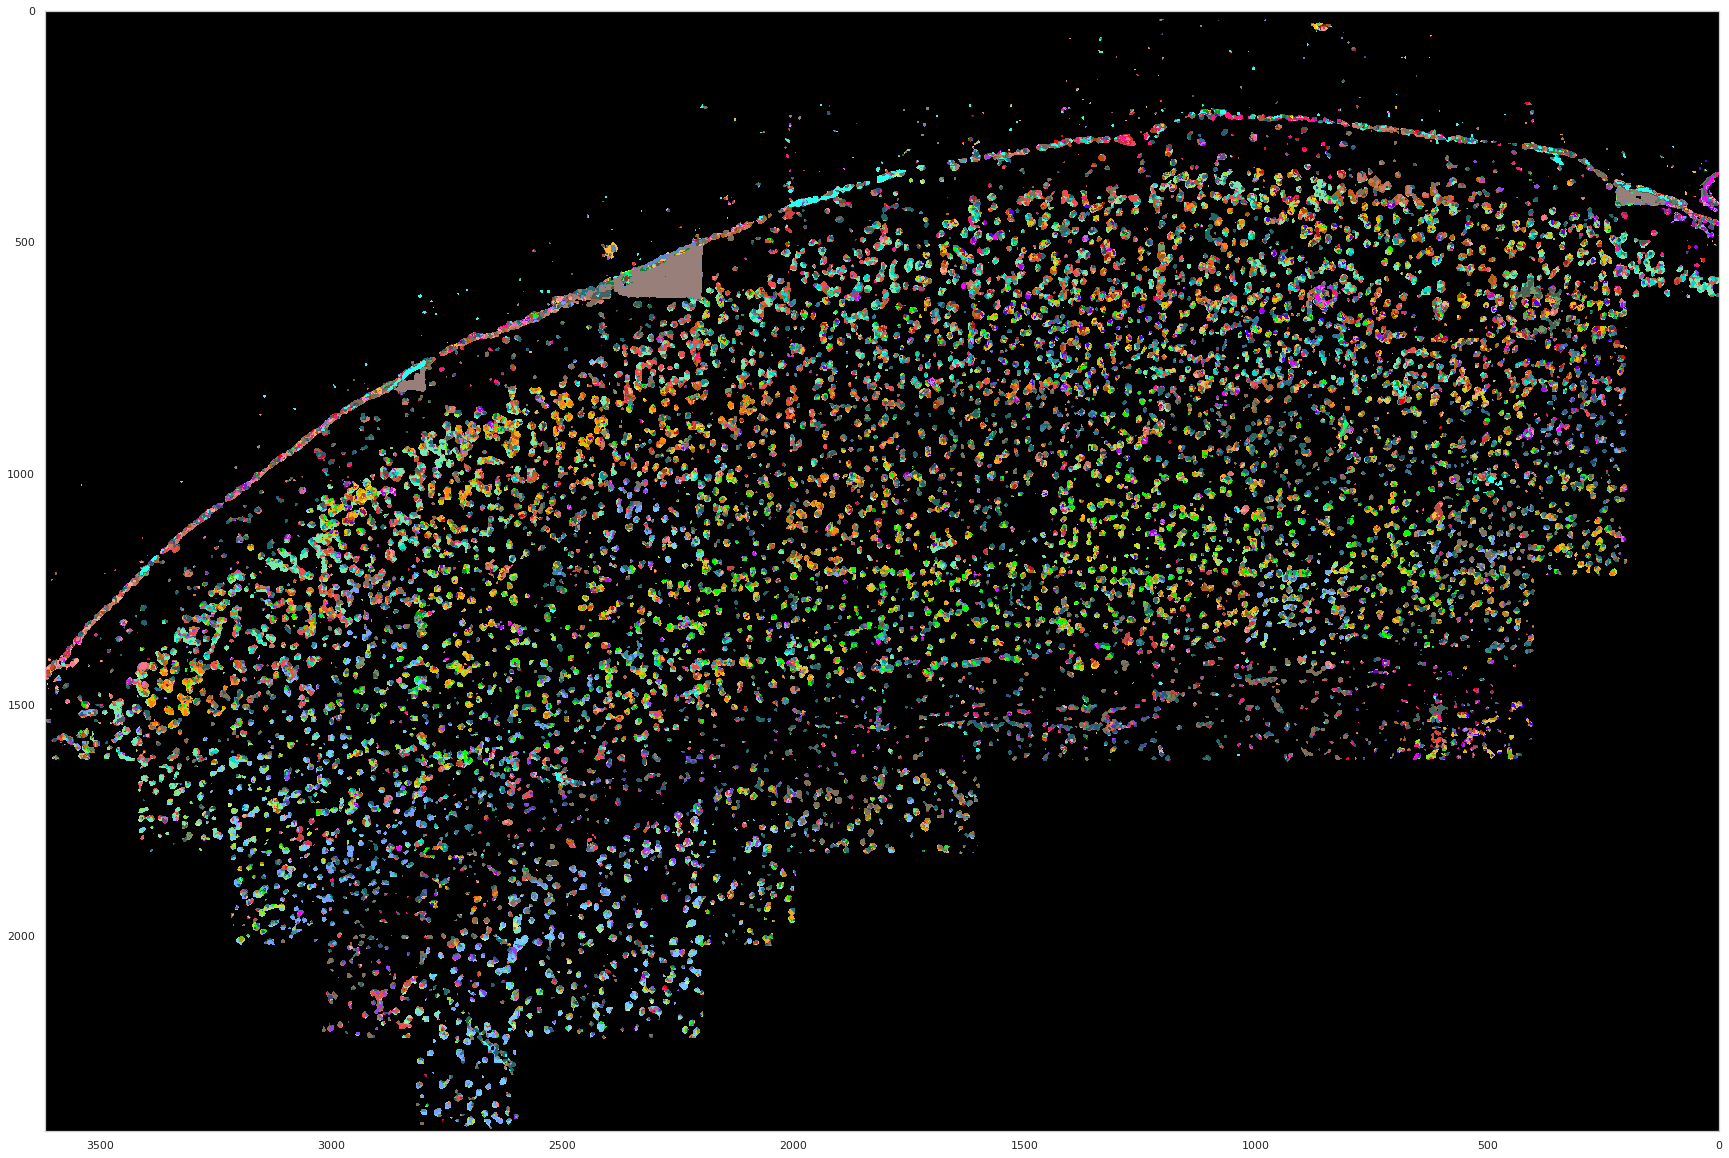

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=1, colors=scrna_colors)

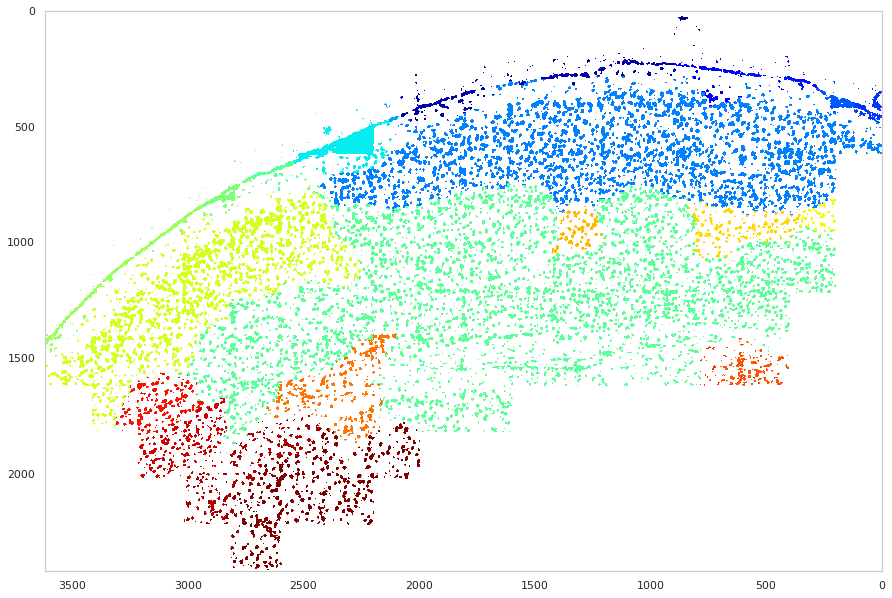

In [114]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.7, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)

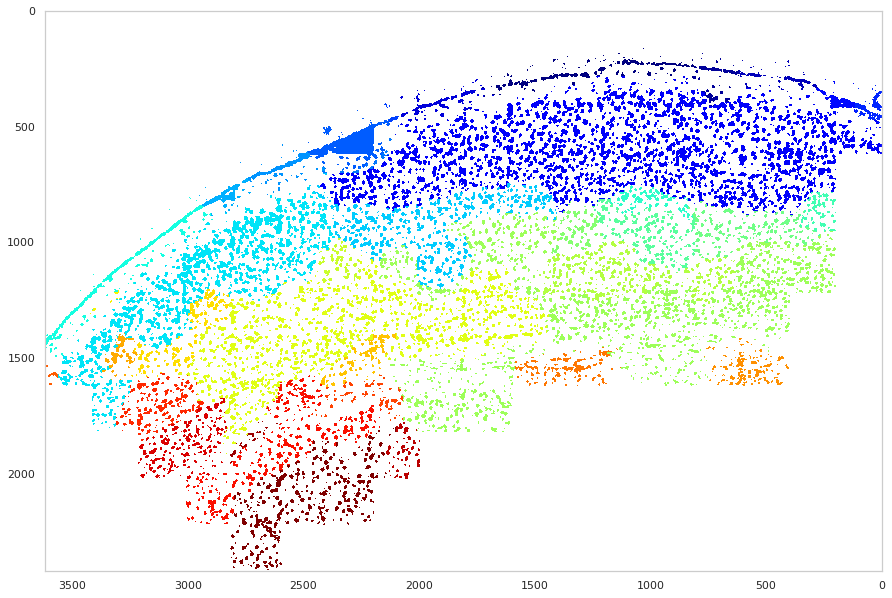

In [115]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)

In [104]:
analysis.cluster_vectors(pca_dims=13, resolution=0.6, max_correlation=1.0, metric="correlation", centroid_correction_threshold=0.6)

Found 16 clusters


In [105]:
analysis.map_celltypes()
analysis.filter_celltypemaps(min_norm=0.5, min_r=0.6)

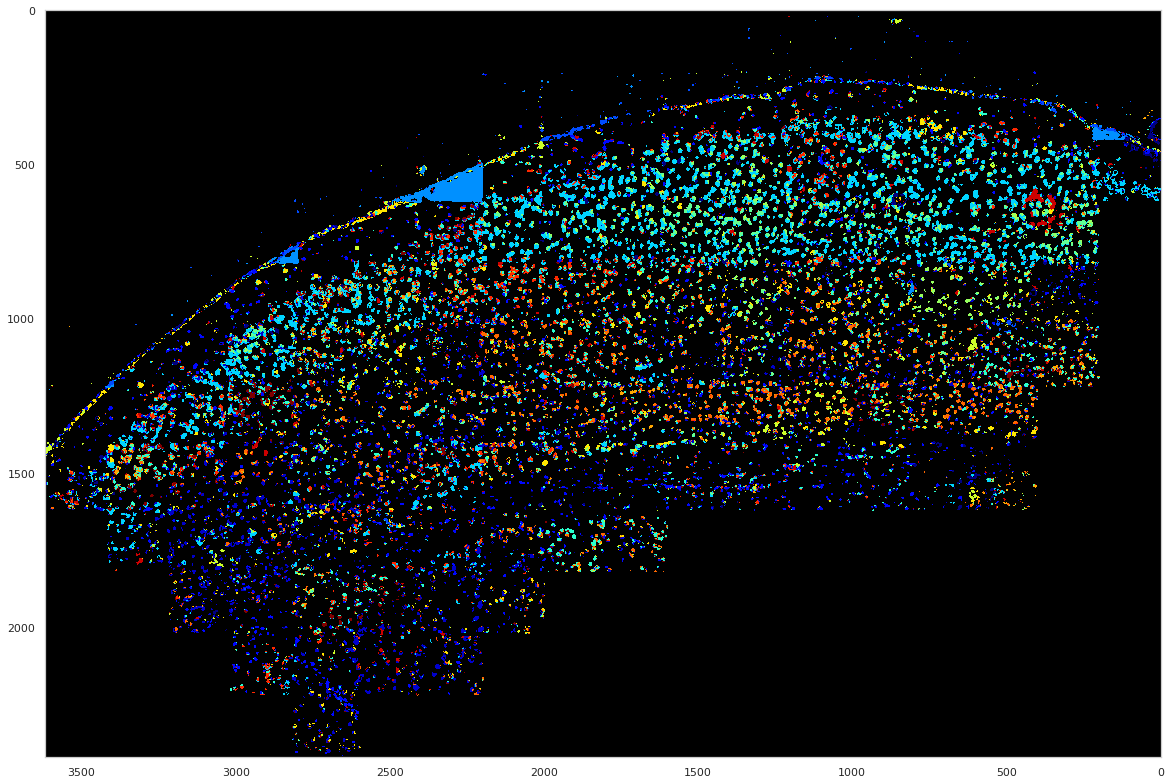

In [106]:
plt.figure(figsize=[20,15])
_=ds.plot_celltypes_map(rotate=True,)#colors=colors,background='white')#,set_alpha=True)